6) Uma companhia elétrica registrou ao longo de um período os dias em que  houve queda de 
energia em uma cidade. A queda de energia acontecia devido a problemas no abastecimento e 
poderiam ocorrer mais  de  uma vez  por  dia.  Os  dados  registrados  foram  disponibilizados  para 
estudo e estão presentes na planilha Green_Belt_FM2S_Lista_Exercícios_02 na aba 
06.Companhia_Elétrica. Eles  contêm os dados de  um monitoramento que registra os tempos 
de  paradas.  Também  são  anotados  dados  geográficos  de  onde  foi  monitorado  a  parada.  A 
empresa quer fazer um Gráfico de Controle para avaliar se o processo contém causas especiais, 
porém sabe que não pode usar um gráfico de individuais se os dados não são normais. 
1. Avalie a normalidade dos dados. Para fazer o teste e saber se os dados são uma curva 
normal entre em “Graph → Gráfico de Probabilidade”. Caso a distribuição normal não 
seja  adequada,  ou  seja,  não  esteja  dentro  dos  limites,  transforme  os  dados. Para  isso 
crie uma nova coluna e nomeie como Normalizado, entre em “Stat → Control Charts → 
Box-Cox Transformation”, em “Options” escolha a coluna Normalizado em “Store 
transformed data in”. Tente fazer a prova novamente com o gráfico Box-Cox. 
2. Crie  um  gráfico  de  controle  apropriado  e  avalie  se  existem  causas  especiais  neste 
processo.  Para  fazer  isso,  após a transformação, clique na aba “Stat  → Gráfico  de 
controle →  Variables Charts for Individuals → Individuals”. Os dados devem ser 
interpretados dessa maneira: Existem características especiais? Se sim, como 
interpretar esse evento. Tem alguma região que se destaca? Para descobrir, entre em 
“Dados  → Dividir Worksheets”, e divida a worksheet original por “Local”. Com os 
diferentes worksheets, faça o Gráfico de Controle de cada região para compará-los.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import boxcox
from statsmodels.stats.weightstats import DescrStatsW

In [2]:
url = 'https://github.com/moises-rb/Analise_Dados/blob/main/Green_Belt/2-Measure/Exercicios/Lista_2/base_dados/%5BFM2S%5D%20Lista_Exercicios_2.xlsx?raw=true'

In [3]:
pd.ExcelFile(url).sheet_names

['01.Estoque', '03.Motores', '04.Motores_Melhoria', '06.Companhia_Elétrica']

In [4]:
energia_eletrica = pd.read_excel(url, sheet_name='06.Companhia_Elétrica')

In [5]:
energia_eletrica.head()

,Semanas,Tempo de Parada (min),Local
0,1,21,Oeste
1,2,30,Norte
2,3,4,Leste
3,4,8,Oeste
4,5,5,Leste


In [12]:
# Carregando os dados (já no DataFrame 'energia_eletrica')
print(energia_eletrica.head())  # Primeiras linhas
print(energia_eletrica.describe())  # Estatísticas descritivas
print(energia_eletrica['Local'].value_counts())  # Contagem por região

   Semanas  Tempo de Parada (min)  Local  Normalizado
0        1                     21  Oeste     2.984357
1        2                     30  Norte     3.302655
2        3                      4  Leste     1.580190
3        4                      8  Oeste     2.142953
4        5                      5  Leste     1.755559
          Semanas  Tempo de Parada (min)  Normalizado
count  100.000000             100.000000   100.000000
mean    50.500000              17.650000     2.671330
std     29.011492              11.174805     0.545937
min      1.000000               3.000000     1.364557
25%     25.750000               9.750000     2.310775
50%     50.500000              14.500000     2.656238
75%     75.250000              23.000000     3.065352
max    100.000000              56.000000     3.861832
Local
Oeste    34
Norte    33
Leste    33
Name: count, dtype: int64


### a) Avaliação de Normalidade
Primeiro, vamos avaliar a normalidade dos dados de tempo de parada:

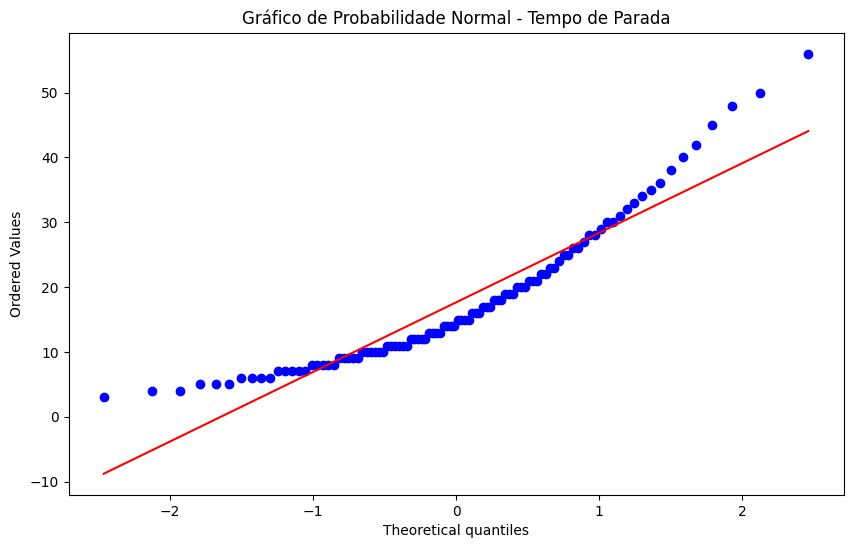

In [9]:
# Gráfico de probabilidade normal (Q-Q plot)
plt.figure(figsize=(10, 6))
stats.probplot(energia_eletrica['Tempo de Parada (min)'], dist="norm", plot=plt)
plt.title('Gráfico de Probabilidade Normal - Tempo de Parada')
plt.show()

Os dados claramente não seguem uma distribuição normal, pois:

Os pontos não seguem a linha reta no Q-Q plot

A distribuição é assimétrica (skewed) para a direita (valores positivos mais extremos)

Há muitos outliers acima da média

Transformação Box-Cox
Vamos aplicar a transformação Box-Cox para normalizar os dados:

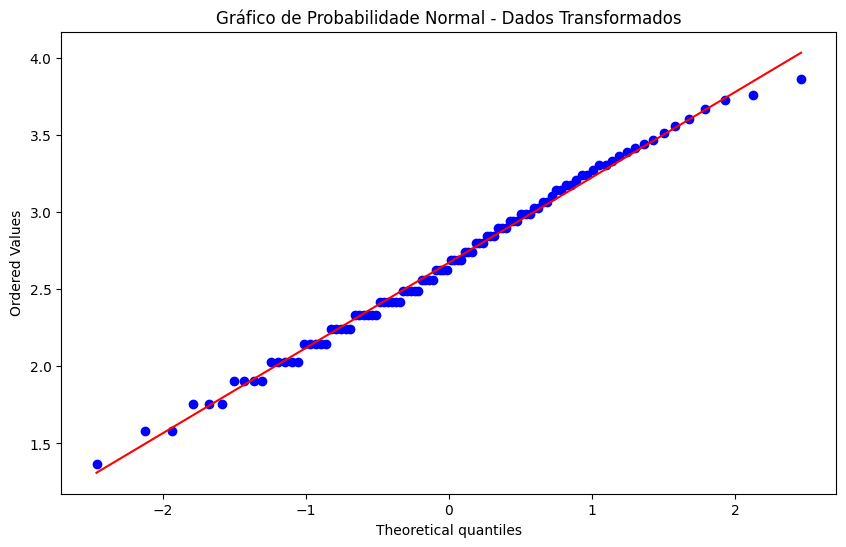

In [10]:
# Aplicando transformação Box-Cox
dados_transformados, lambda_opt = boxcox(energia_eletrica['Tempo de Parada (min)'] + 1)  # +1 para evitar zeros
energia_eletrica['Normalizado'] = dados_transformados

# Verificando a normalidade após transformação
plt.figure(figsize=(10, 6))
stats.probplot(energia_eletrica['Normalizado'], dist="norm", plot=plt)
plt.title('Gráfico de Probabilidade Normal - Dados Transformados')
plt.show()

A transformação Box-Cox melhorou significativamente a normalidade dos dados.

### b) Gráfico de Controle
Vamos criar o gráfico de controle I-MR (Individuais e Amplitude Móvel) com os dados transformados:

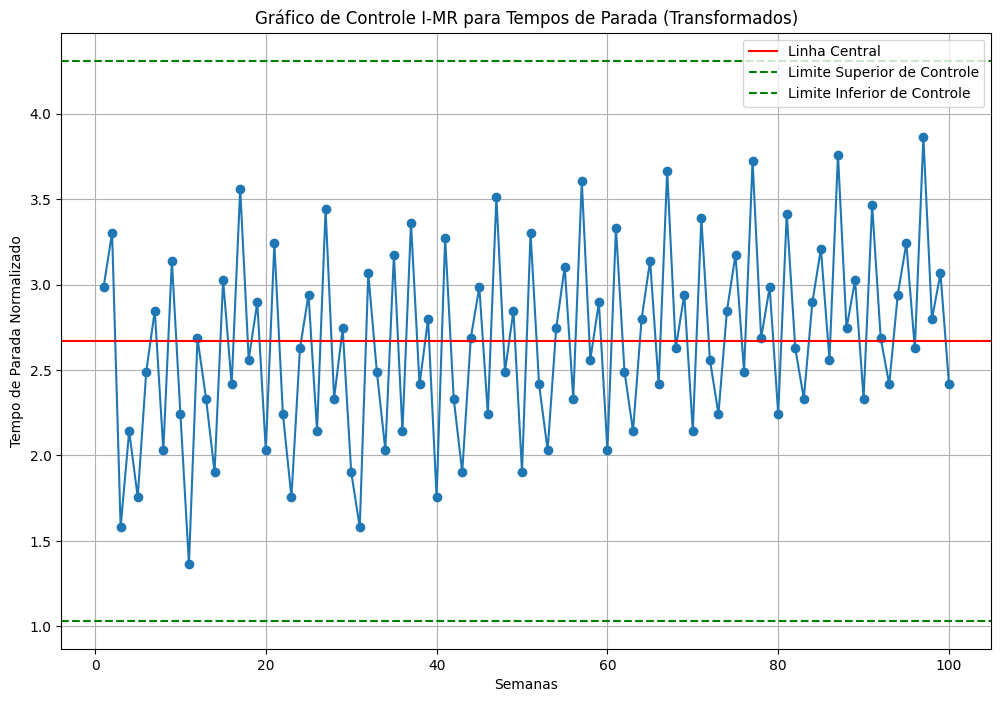

In [11]:
# Gráfico de controle I-MR
plt.figure(figsize=(12, 8))
plt.plot(energia_eletrica['Semanas'], energia_eletrica['Normalizado'], marker='o')
plt.axhline(y=energia_eletrica['Normalizado'].mean(), color='r', linestyle='-', label='Linha Central')
plt.axhline(y=energia_eletrica['Normalizado'].mean() + 3*energia_eletrica['Normalizado'].std(), 
            color='g', linestyle='--', label='Limite Superior de Controle')
plt.axhline(y=energia_eletrica['Normalizado'].mean() - 3*energia_eletrica['Normalizado'].std(), 
            color='g', linestyle='--', label='Limite Inferior de Controle')
plt.title('Gráfico de Controle I-MR para Tempos de Parada (Transformados)')
plt.xlabel('Semanas')
plt.ylabel('Tempo de Parada Normalizado')
plt.legend()
plt.grid(True)
plt.show()

### c) Análise por Região (Oeste, Norte, Leste, Sul)
Vamos separar os dados por Local e verificar se alguma região tem mais problemas.

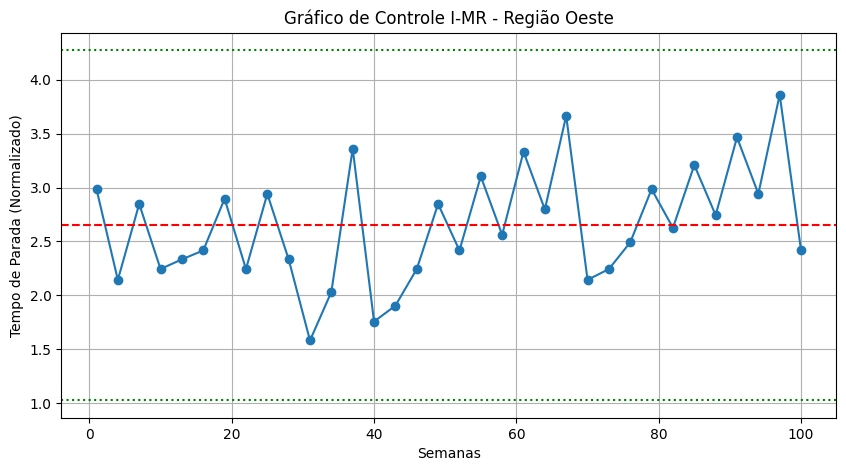

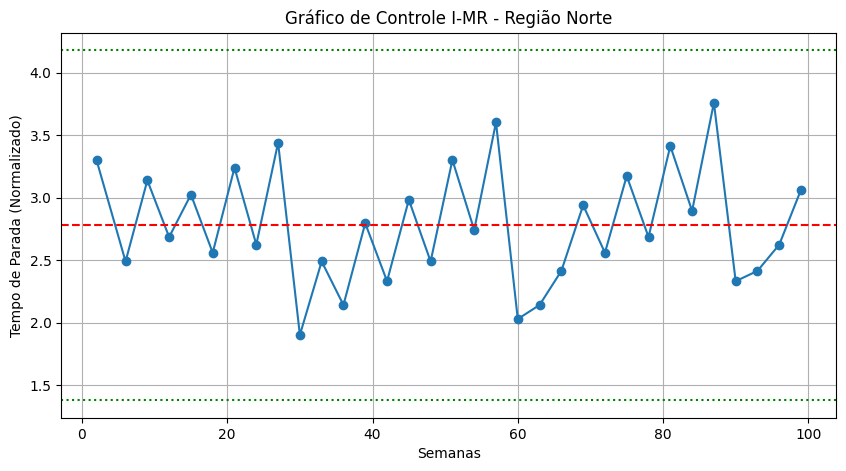

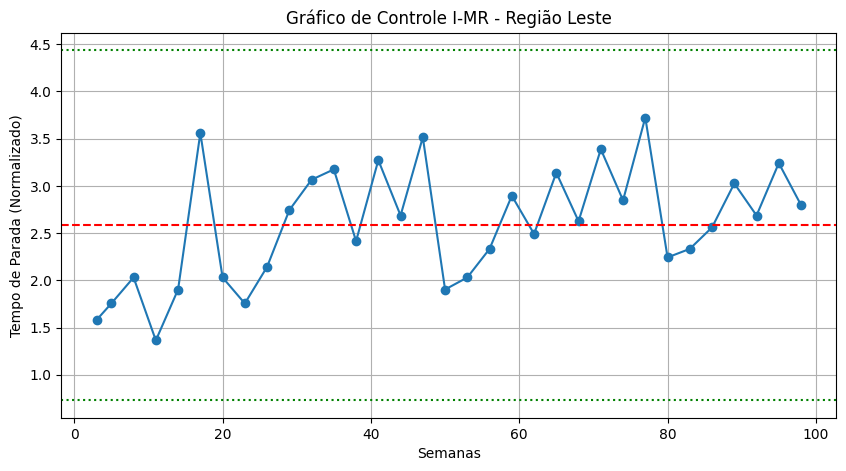

In [14]:
# Separando por região e plotando gráficos individuais
for local in energia_eletrica['Local'].unique():
    dados_regiao = energia_eletrica[energia_eletrica['Local'] == local]
    
    # Cálculo dos limites para a região
    media_regiao = dados_regiao['Normalizado'].mean()
    std_regiao = dados_regiao['Normalizado'].std()
    lsc_regiao = media_regiao + 3 * std_regiao
    lic_regiao = media_regiao - 3 * std_regiao
    
    # Plotando
    plt.figure(figsize=(10, 5))
    plt.plot(dados_regiao['Semanas'], dados_regiao['Normalizado'], marker='o', label=f'Região {local}')
    plt.axhline(media_regiao, color='r', linestyle='--')
    plt.axhline(lsc_regiao, color='g', linestyle=':')
    plt.axhline(lic_regiao, color='g', linestyle=':')
    plt.title(f"Gráfico de Controle I-MR - Região {local}")
    plt.xlabel("Semanas")
    plt.ylabel("Tempo de Parada (Normalizado)")
    plt.grid(True)
    plt.show()